In [1]:
import numpy as np
import pandas as pd

In [2]:
class NaiveBayes:
    def fit(self, X, y):
        y = y.astype(np.int64)
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # initialise mean, variance, priors
        self._mean = np.zeros((n_classes, n_features))
        self._variance = np.zeros((n_classes, n_features))
        self._priors = np.zeros(n_classes, dtype= np.float64)

        for c in self._classes:
            X_c = X[c==y]
            self._mean[c, :] = X_c.mean(axis= 0)
            self._variance[c, :] = X_c.var(axis= 0)
            self._priors[c] = X_c.shape[0] / float(n_samples)

    def _predict(self, x):
        posteriors = []
        for index, c in enumerate(self._classes):
            prior = np.log(self._priors[index])
            class_conditional = np.sum(np.log(self._pdf(index, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)

        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_index, x):
        mean = self._mean[class_index]
        variance = self._variance[class_index]
        numerator = np.exp(- (x - mean) ** 2 / (2 * variance))
        denominator = np.sqrt(2 * np.pi * variance)
        return numerator / denominator   


    def predict(self, X):
        y_predicted = [self._predict(x) for x in X]
        return y_predicted


In [3]:
def accuracy(y_test, predictions):
    return np.sum(y_test == predictions) / len(y_test)

In [4]:
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler

In [5]:
data5 = loadmat('data5.mat')
data = pd.DataFrame(data5['x']) 
data = data.sample(frac= 1)

In [6]:
X = data.iloc[:, :72]
X = (X - X.mean(axis= 0)) / X.std(axis= 0)
y = data.iloc[:, 72]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 23)
X_train = StandardScaler().fit_transform(X_train)
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [8]:
nb = NaiveBayes()

In [9]:
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [10]:
score = accuracy(y_test, y_pred)
score

0.7728119180633147

In [11]:
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt

In [12]:
cm = metrics.confusion_matrix(y_test, y_pred)

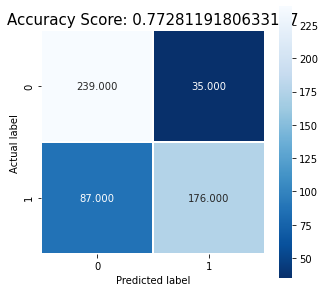

In [13]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()
#plt.savefig('Logistic confusion matrix')